In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import pi
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./../../data/cleaned_data.csv", skipinitialspace=True, sep=',')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174207 entries, 0 to 174206
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       174207 non-null  object 
 1   state                      174207 non-null  object 
 2   city_or_county             174207 non-null  object 
 3   address                    161854 non-null  object 
 4   latitude                   174207 non-null  float64
 5   longitude                  174207 non-null  float64
 6   congressional_district     171311 non-null  float64
 7   state_house_district       152161 non-null  float64
 8   state_senate_district      157207 non-null  float64
 9   participant_age1           140191 non-null  float64
 10  participant_age_group1     166276 non-null  object 
 11  participant_gender1        169655 non-null  object 
 12  min_age_participants       140204 non-null  float64
 13  avg_age_participants       14

In [3]:
# Drop rows with n_participants = 0
df.loc[df['n_participants'] == 0] = np.nan
df = df.dropna(subset=['n_participants'])

In [4]:
df['killed_ratio'] = df['n_killed']/df['n_participants'] 
df['injured_ratio'] = df['n_injured']/df['n_participants'] 
df['child_ratio'] = df['n_participants_child']/df['n_participants'] 
df['teen_ratio'] = df['n_participants_teen']/df['n_participants'] 
df['adult_ratio'] = df['n_participants_adult']/df['n_participants'] 
df['arrested_ratio'] = df['n_arrested']/df['n_participants'] 
df['unharmed_ratio'] = df['n_unharmed']/df['n_participants'] 
df['males_ratio'] = df['n_males']/df['n_participants'] 
df['females_ratio'] = df['n_females']/df['n_participants'] 

In [5]:
cols = ['latitude', 'longitude', 'congressional_district', 'state_house_district', 'state_senate_district', 'participant_age1', 'min_age_participants', 'avg_age_participants',
        'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
        'n_unharmed', 'n_participants', 'povertyPercentage', 'candidatevotes', 'totalvotes', 'killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 
        'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio']
df = df[cols]
df = df.dropna()

In [6]:
corr_threshold = 0.9
print("Attributo A\t\tAttributo B\t\tCorr(A,B)")
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = df[df.columns[i]].corr(df[df.columns[j]])
        if  corr > corr_threshold:
            print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.3f}'.format(corr))

Attributo A		Attributo B		Corr(A,B)
participant_age1	avg_age_participants	0.942
participant_age1	max_age_participants	0.921
min_age_participants	avg_age_participants	0.949
avg_age_participants	max_age_participants	0.947


In [7]:
cols = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'candidatevotes', 'totalvotes']
df.drop(cols, axis=1, inplace=True)

In [8]:
minmax_scaler = MinMaxScaler()
norm_df = minmax_scaler.fit_transform(df.values)

## K-MEANS

C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

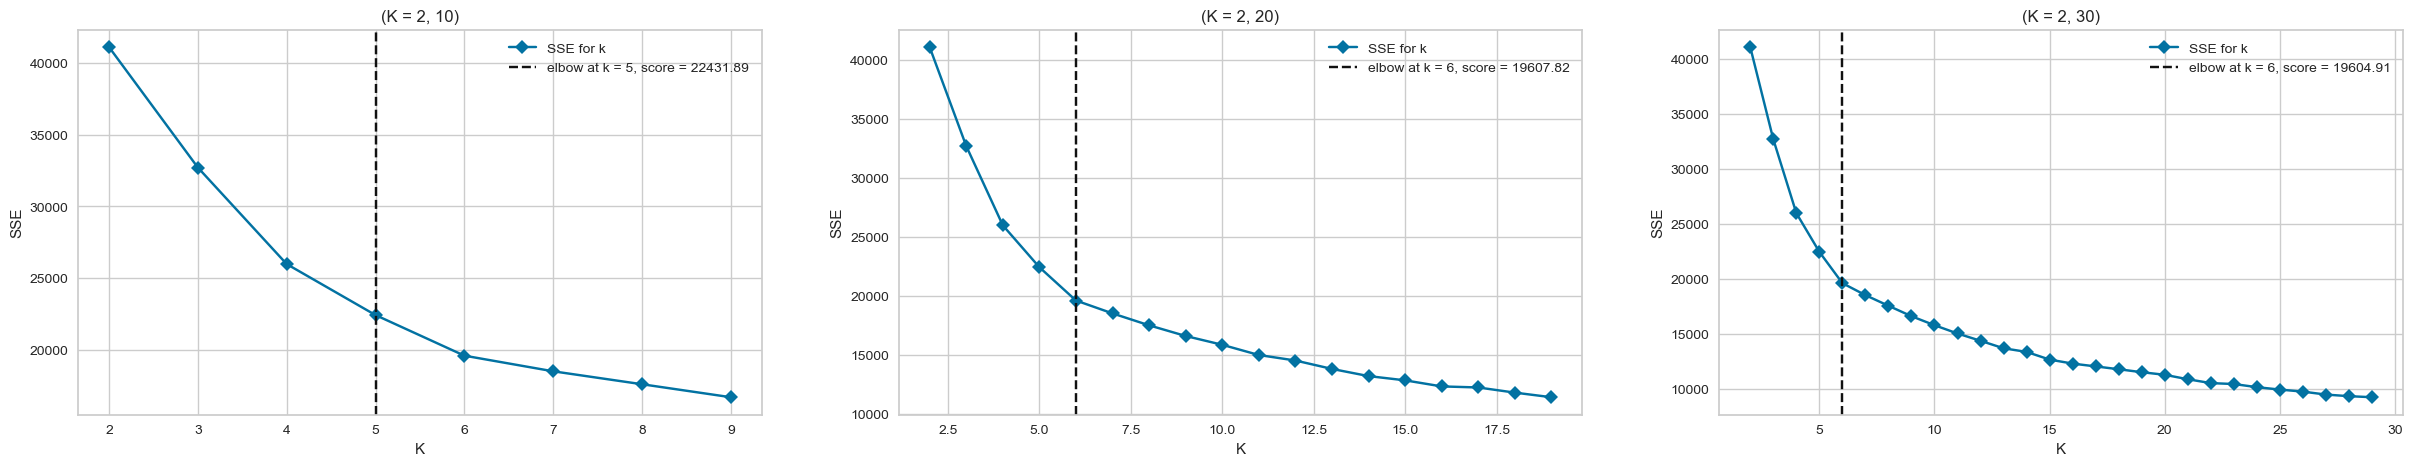

In [9]:
from yellowbrick.cluster import KElbowVisualizer

k_start = [2]
k_max = [10,20,30]
Ks = []
model = KMeans()

f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='distortion', timings=False, ax=axs[i])
    vis.fit(norm_df)  
    axs[i].set_title('(K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('SSE')
    axs[i].set_xlabel('K')
    axs[i].legend(['SSE for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
    if (vis.elbow_value_ not in Ks) and (vis.elbow_value_ != None):
        Ks.append(vis.elbow_value_)
plt.show()

### Silhouette Score

C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alessia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

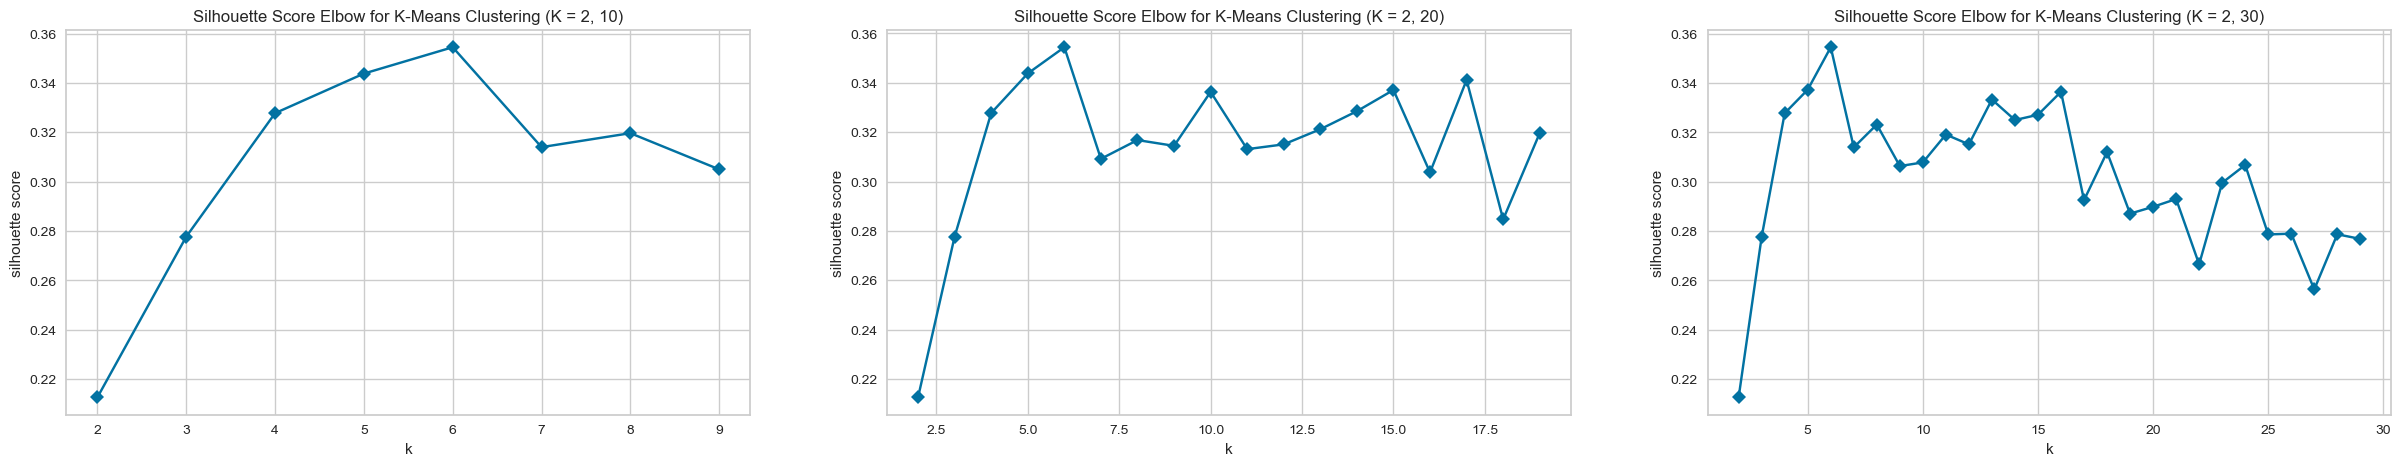

In [10]:
k_start = [2]
k_max = [10, 20, 30]
model = KMeans()

# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='silhouette', timings=False, ax=axs[i], locate_elbow=False)
    vis.fit(norm_df)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()

Il punto di massimo corrisponde a k=6 in tutti e 3 i casi. 

**Risultati con k=5**

In [11]:
model = KMeans(n_clusters=5, n_init=10, max_iter=100)
model.fit(norm_df)
centroidi = model.cluster_centers_
for i, centroide in enumerate(centroidi):
    print(f"Centroide {i+1}: {centroide}\n")

Centroide 1: [0.61807624 0.76263059 0.14840738 0.06359936 0.19746731 0.00664969
 0.04947704 0.00614566 0.05425319 0.00899201 0.01298312 0.03988149
 0.01349106 0.01264856 0.01683645 0.48892025 0.15369809 0.48116348
 0.01766715 0.90671235 0.0756205  0.23869486 0.12819796 0.90928509
 0.09071491]

Centroide 2: [0.60794994 0.75426951 0.15848709 0.07004604 0.22117807 0.00127051
 0.0020518  0.05384192 0.06104509 0.01104393 0.01507215 0.01218451
 0.04296129 0.00114674 0.02311656 0.46671272 0.11143297 0.09887382
 0.00341157 0.0198226  0.97676583 0.80706904 0.00659697 0.90589402
 0.09410598]

Centroide 3: [0.66147512 0.77898175 0.13630014 0.05566327 0.18106571 0.00532216
 0.00125597 0.04345151 0.04816387 0.01133509 0.00423334 0.07668226
 0.00131573 0.00190279 0.01342036 0.44959825 0.02707768 0.94827445
 0.02507117 0.01283739 0.96209144 0.01257971 0.01114703 0.87905379
 0.12094621]

Centroide 4: [0.58350917 0.76544373 0.16087666 0.06914805 0.20800058 0.00500818
 0.00229017 0.06865562 0.075808   0

In [12]:
from scipy.spatial import distance
mean_distance = distance.cdist(centroidi, centroidi, 'euclidean').mean()

print(f"Distanza media tra i centroidi: {mean_distance}")

Distanza media tra i centroidi: 1.0231345525787996


Visualization of clusters centers by means of parallel coordinates

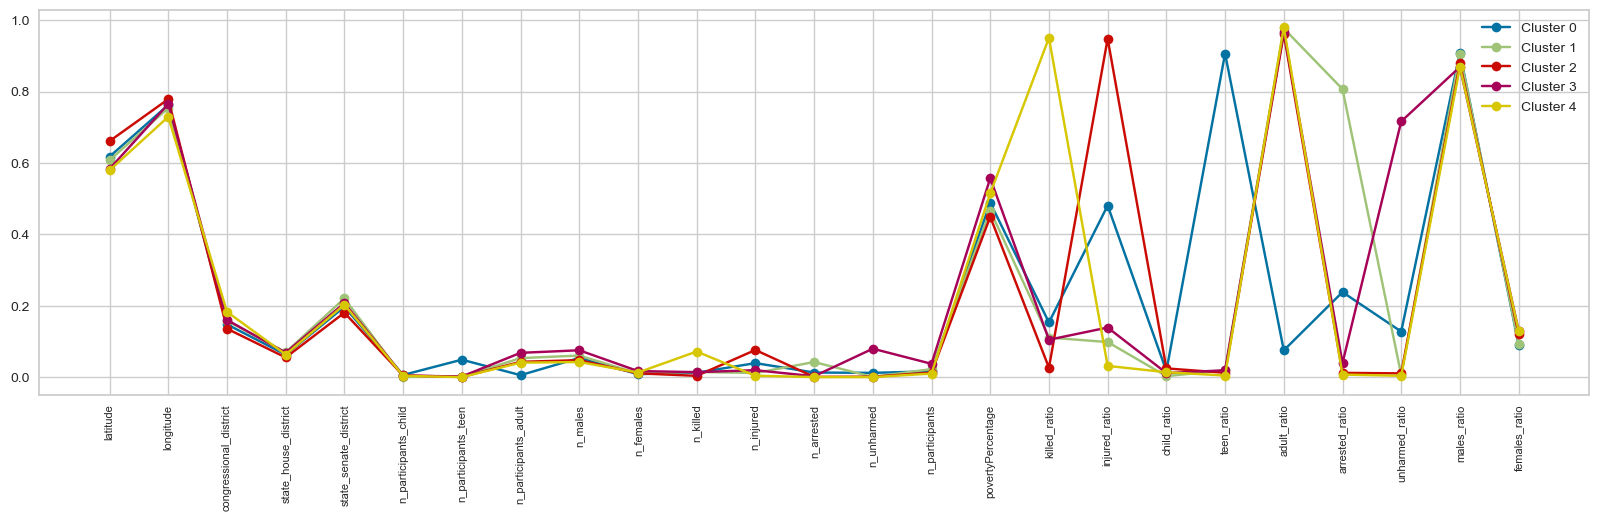

In [13]:
plt.figure(figsize=(20, 5))
for i in range(0, len(centroidi)):
    plt.plot(centroidi[i], marker='o', label='Cluster %s' % (i))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.legend(fontsize=10)
plt.show()

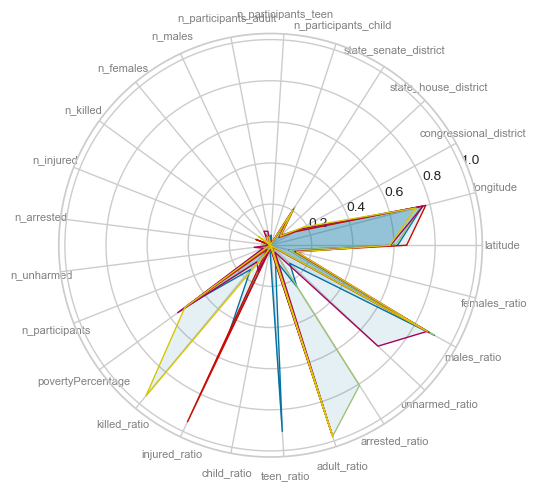

In [14]:
N = len(df.columns)
for i in range(0, len(centroidi)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroidi[i].tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

In [15]:
model.labels_

array([2, 1, 4, ..., 2, 2, 1])

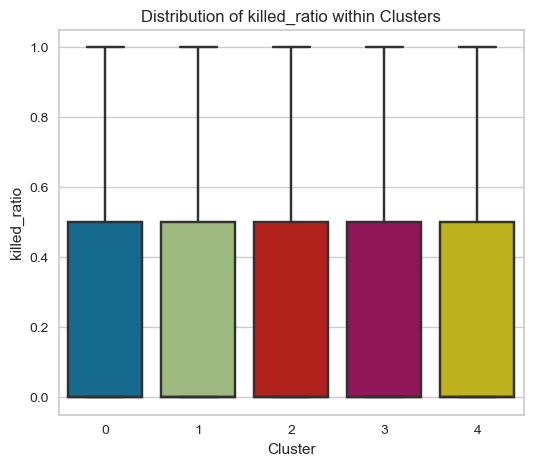

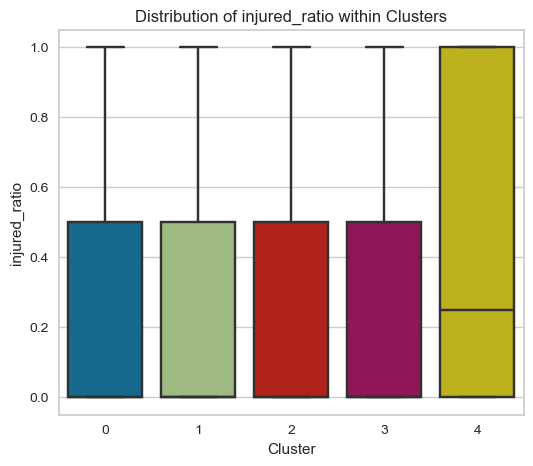

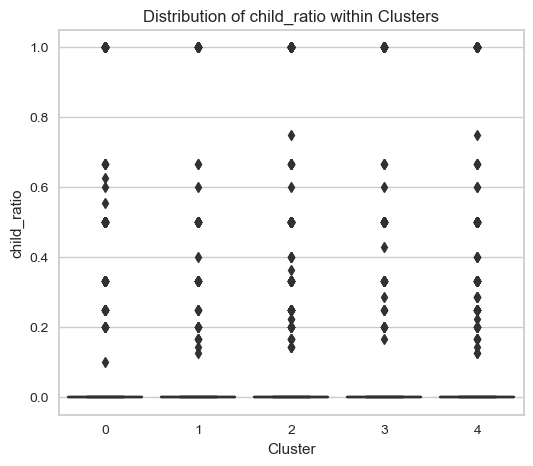

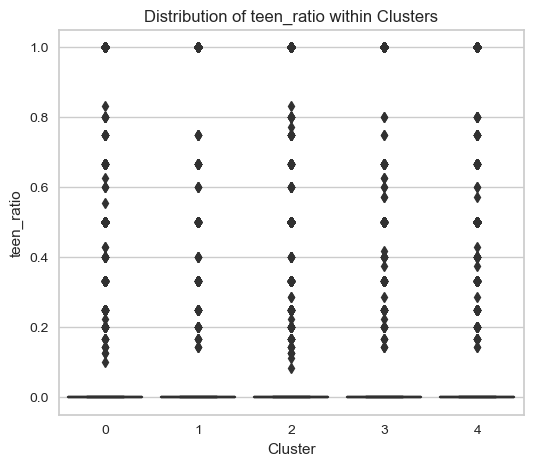

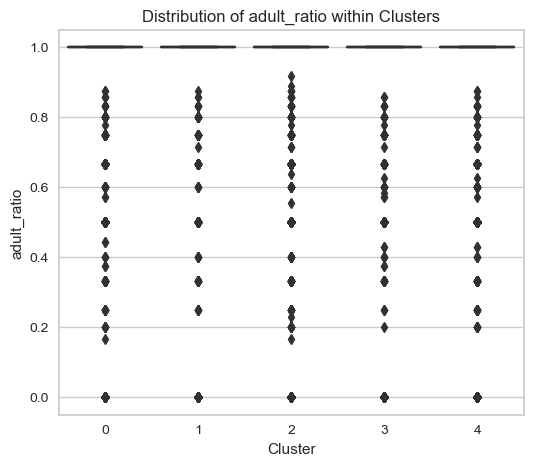

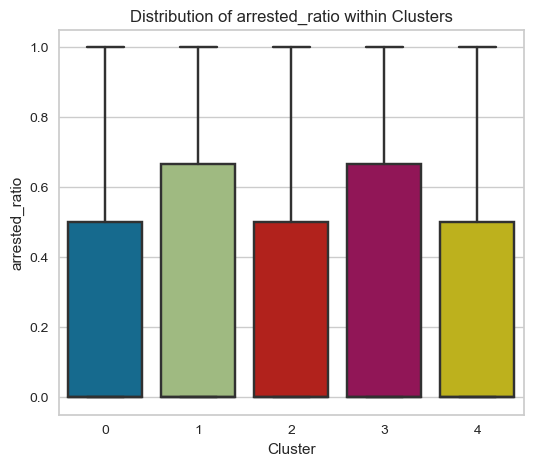

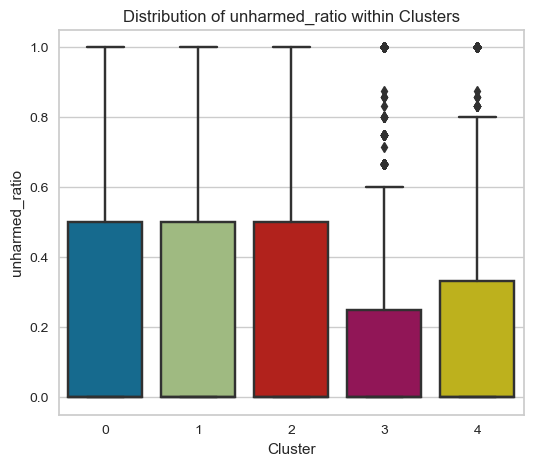

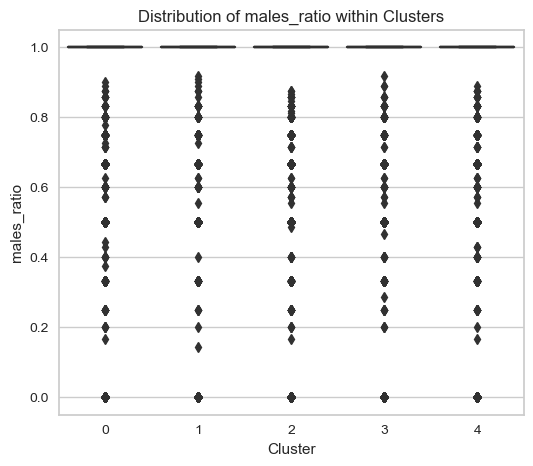

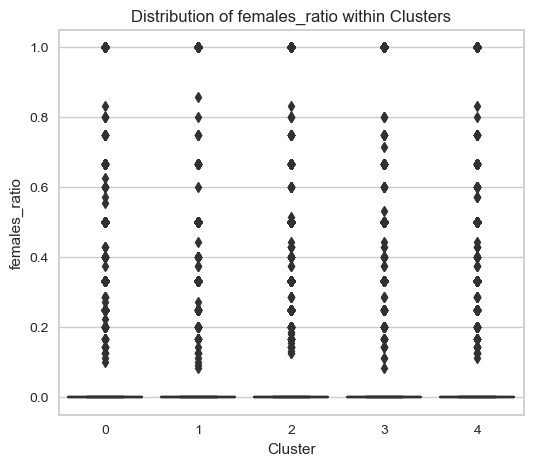

In [16]:
data = pd.DataFrame(df, columns=['killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio'])
data['Cluster'] = model.fit_predict(df)

# Analyze the distribution of variables within clusters using boxplots
for variable in data.columns[:-1]: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Cluster', y=variable, data=data)
    plt.title(f'Distribution of {variable} within Clusters')
    plt.show()

**Risultati con k=6**

In [17]:
model = KMeans(n_clusters=6, n_init=10, max_iter=100)
model.fit(norm_df)
centroidi = model.cluster_centers_
mean_distance = distance.cdist(centroidi, centroidi, 'euclidean').mean()
print(f"Distanza media tra i centroidi: {mean_distance}")

Distanza media tra i centroidi: 1.0721180864695992


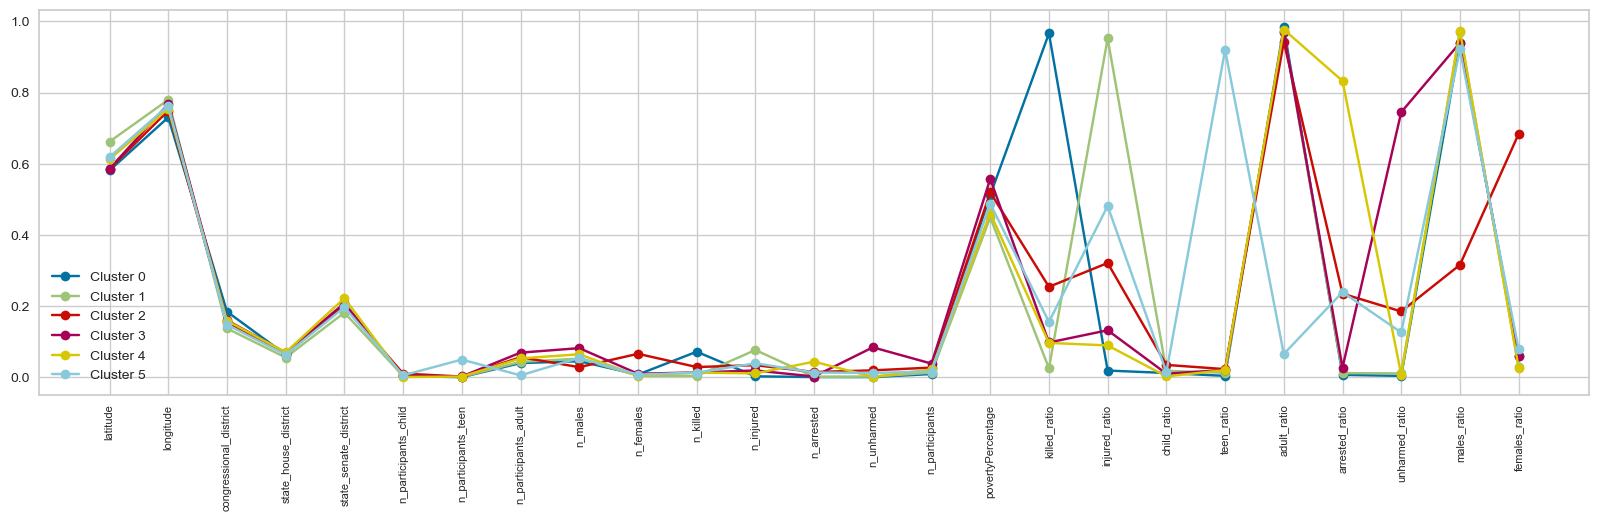

In [18]:
plt.figure(figsize=(20, 5))
for i in range(0, len(centroidi)):
    plt.plot(centroidi[i], marker='o', label='Cluster %s' % (i))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.legend(fontsize=10)
plt.show()

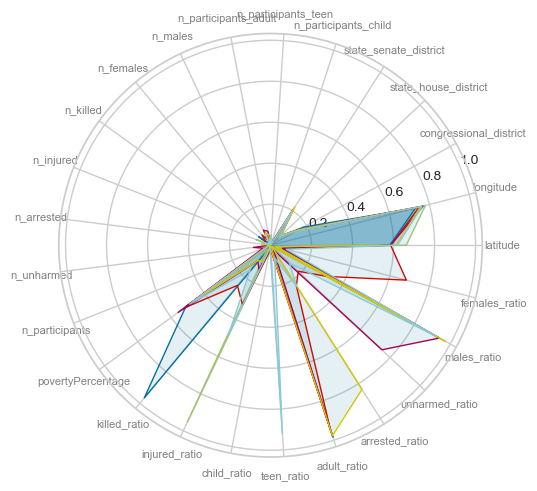

In [19]:
N = len(df.columns)
for i in range(0, len(centroidi)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroidi[i].tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
	

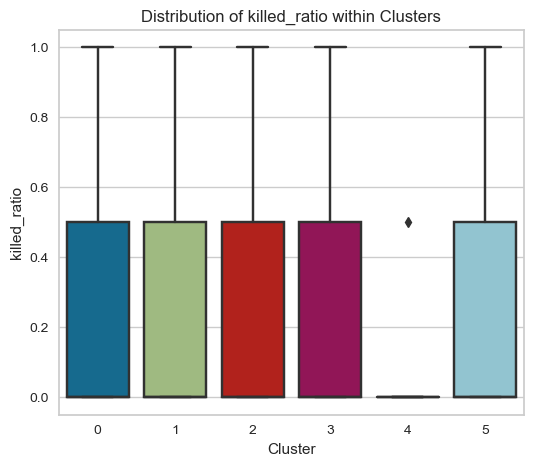

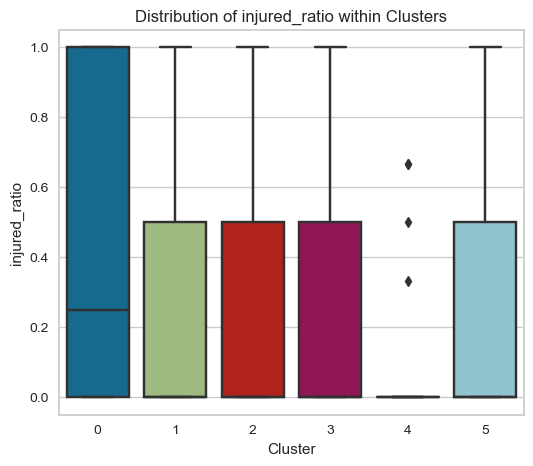

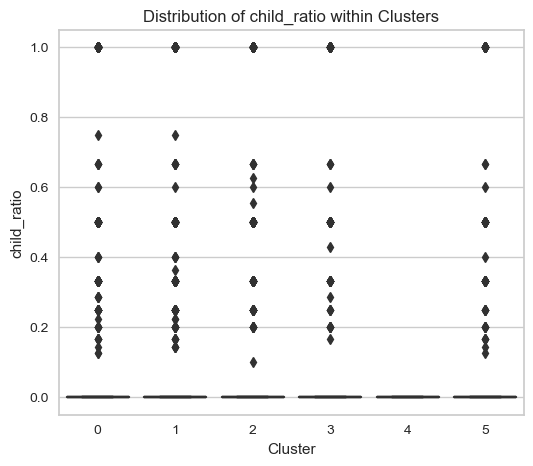

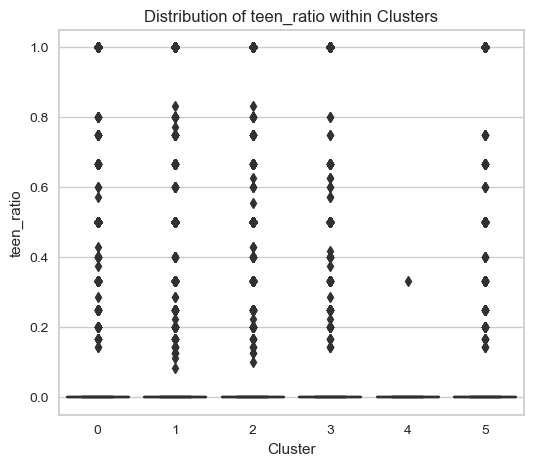

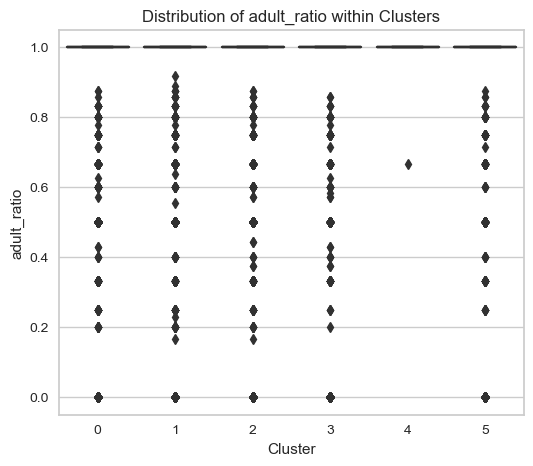

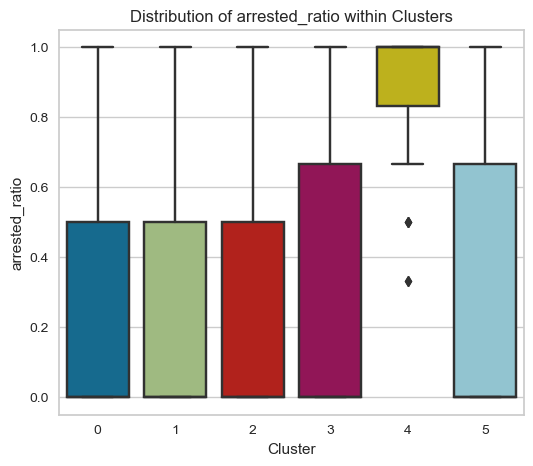

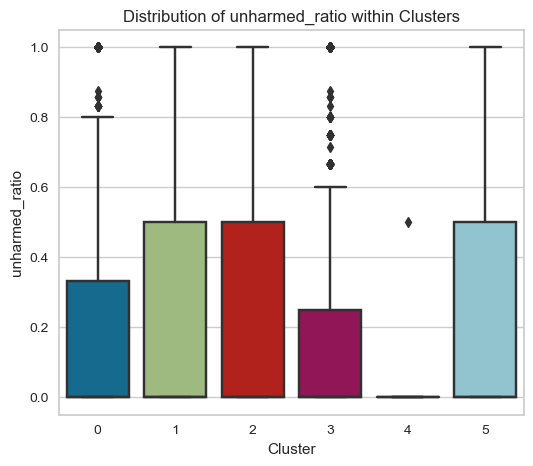

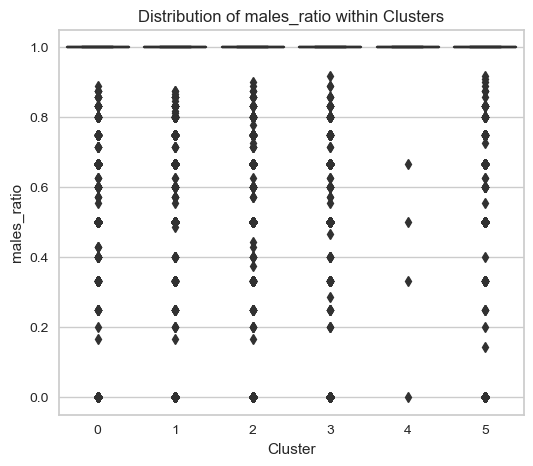

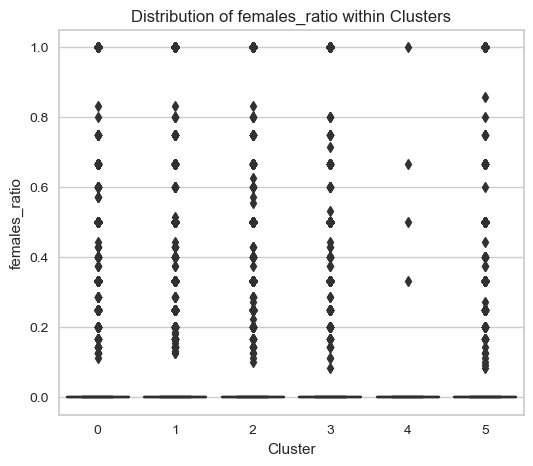

In [20]:
data = pd.DataFrame(df, columns=['killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio'])
data['Cluster'] = model.fit_predict(df)

# Analyze the distribution of variables within clusters using boxplots
for variable in data.columns[:-1]: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Cluster', y=variable, data=data)
    plt.title(f'Distribution of {variable} within Clusters')
    plt.show()

## Considerazioni finali

In [25]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

Ks = [5,6]
centers = []
labels = []
inertia = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
    kmeans.fit(norm_df) 
    centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) 
    labels.append(kmeans.labels_) 
    inertia.append(kmeans.inertia_) 

int_metrics_K=pd.DataFrame() # we create a dataframe to contain the results of the evaluation

k_cols = []
for k in Ks:
    k_cols.append(str(k))
    
sse=[]
db=[]
sil=[]
cal_har=[]

# categorical features
for i in range(len(Ks)):
    sse.append(inertia[i])
    db.append(davies_bouldin_score(norm_df, labels[i]))
    sil.append(silhouette_score(norm_df, labels[i]))
    cal_har.append(calinski_harabasz_score(norm_df, labels[i]))

int_metrics_K['K'] = k_cols
int_metrics_K['SSE'] = sse
int_metrics_K['DaviesBouldin'] = db
int_metrics_K['Silhouette'] = sil
int_metrics_K['CalinskiHarabasz'] = cal_har
int_metrics_K.set_index(['K'], inplace=True)
int_metrics_K

,SSE,DaviesBouldin,Silhouette,CalinskiHarabasz
K,,,,
5,22430.482781,1.120842,0.339824,16348.607535
6,19605.009696,1.162202,0.354593,16446.740608


- SSE: comportamento atteso (decresce all’aumentare di k), non rivela particolari informazioni
- Davies Bouldin: scelgo quello più basso --> 5
- Silhouette: scelgo quello più alto --> 6
- Calinski Harabasz: scelgo quello più alto --> 6

(i valori cambiano leggermente a ogni esecuzione)